In [ ]:
# EXPERIMENT 5 

In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Step 2: Load the dataset

df = pd.read_csv("car_evaluation.csv")
print("Dataset loaded successfully ✅")
print(df.head())

Dataset loaded successfully ✅
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


In [4]:
# Step 3: Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [7]:
print(df.columns)

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')


In [9]:
# Step 4: Separate features and target
X = df.drop('unacc', axis=1)
y = df['unacc']


In [10]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Step 6: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:

# Step 7: Predictions
y_pred = rf_model.predict(X_test)

In [13]:
# Step 8: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy:.2f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of Random Forest Classifier: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



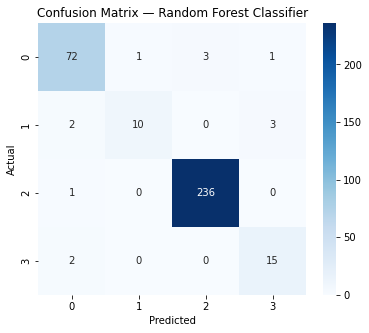

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix — Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

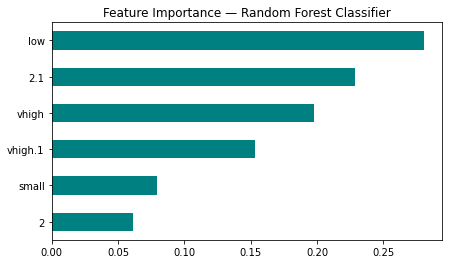

In [15]:
# Step 9: Feature Importance
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(7,4), color='teal')
plt.title("Feature Importance — Random Forest Classifier")
plt.show()